In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

base_dir = os.path.normpath("G:/.shortcut-targets-by-id/0B3ejcGO9fA5eYXlHMW9tekVERmc/JB labs documents/Updated_JB_documents_2019/JB LAB_Protocols/plate_reader")



In [6]:
shaking_param = 'periodic'

fnames = {'continuous': '20250529_growth_continuous.csv',
          'periodic': '20250603_growth_periodic.csv'}

fnames_maps = {'continuous': '20250529_growth_continuous_sample_map.csv',
          'periodic': '20250603_growth_periodic_sample_map.csv'}


skiprows_param = {'continuous': 10, 
                  'periodic' : 6}


od_data = pd.read_csv(base_dir + os.sep + fnames[shaking_param], skiprows=skiprows_param[shaking_param], index_col=0)
od_data = od_data.drop(columns = ['Time'])
times_raw = list(od_data.columns)

times = []
for time in times_raw:
    timesp = time.split(' h ')
    hour = int(timesp[0])
    if timesp[1]=='': 
        min = 0
    else: 
        min = int(timesp[1].split(' min')[0])
    times.append(float(hour + min/60))


In [7]:
#Plot entire 96 well plate: 

fig, axarr = plt.subplots(8,12, figsize = (120,80), sharey=True, sharex = True)
for jj, row in enumerate('ABCDEFGH'):
    for kk, col in enumerate(range(1,13)): 
        ax = axarr[jj,kk]
        well = row + str(col).zfill(2)
        ax.plot(times, od_data.loc[well,:])
        ax.set_ylim(0,1.25)
        if col==1: 
            ax.set_ylabel(row)
        if row=='H': 
            ax.set_xlabel(str(col))

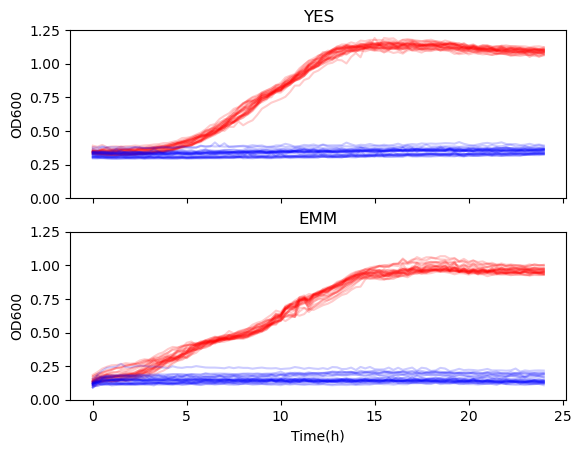

In [8]:
sample_map = pd.read_csv(base_dir + os.sep + '/' + fnames_maps[shaking_param])

fig, axarr = plt.subplots(2,1, sharex=True)

colormap = {'JB22': 'r', 
            'Control': 'b', 
            }

for jj, media in enumerate(['YES','EMM']): 
    ax = axarr[jj]
    ax.set_title(media)
    if jj==1: 
        ax.set_xlabel('Time(h)')
    ax.set_ylabel('OD600')
    ax.set_ylim([0, 1.25])
    for strain in ['JB22', 'Control']:
        sample_map_media_strain = sample_map[(sample_map['Media']==media) & (sample_map['Strain']==strain)]
        for row, col in zip(sample_map_media_strain['Row'], sample_map_media_strain['Column']):
            well = row + str(col).zfill(2)
            ax.plot(times, od_data.loc[well,:], c = colormap[strain], alpha = 0.2)





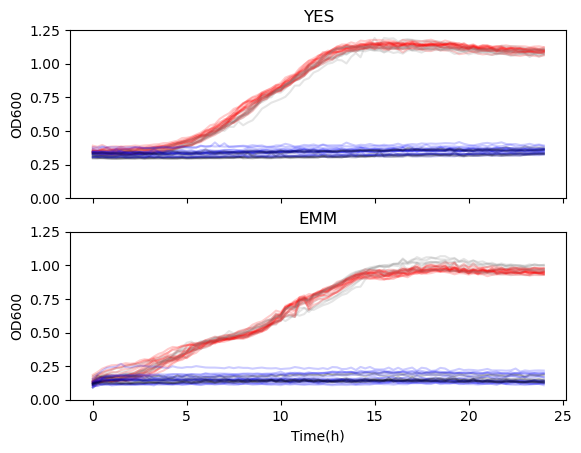

In [9]:
#plot edge vs middle
fig, axarr = plt.subplots(2,1, sharex=True)

colormap = {'JB22': 'r', 
            'JB22_edge': 'grey',
            'Control': 'b', 
            'Control_edge': 'k'
            }

for jj, media in enumerate(['YES','EMM']): 
    ax = axarr[jj]
    ax.set_title(media)
    if jj==1: 
        ax.set_xlabel('Time(h)')
    ax.set_ylabel('OD600')
    ax.set_ylim([0, 1.25])
    for strain in ['JB22', 'Control']:
        sample_map_media_strain = sample_map[(sample_map['Media']==media) & (sample_map['Strain']==strain)]
        for row, col in zip(sample_map_media_strain['Row'], sample_map_media_strain['Column']):
            if (row in {'A','H'}) | (col in {1,12}):  # Edge well
                well = row + str(col).zfill(2)          
                ax.plot(times, od_data.loc[well,:], c = colormap[strain + '_edge'], alpha = 0.2)
            else: 
                well = row + str(col).zfill(2)          
                ax.plot(times, od_data.loc[well,:], c = colormap[strain], alpha = 0.2)



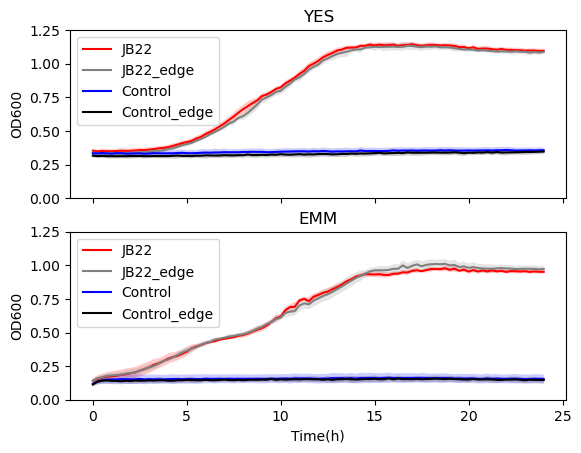

In [10]:
#Plot mean curves

#plot edge vs middle
fig, axarr = plt.subplots(2,1, sharex=True)

colormap = {'JB22': 'r', 
            'JB22_edge': 'grey',
            'Control': 'b', 
            'Control_edge': 'k'
            }

for jj, media in enumerate(['YES','EMM']): 
    ax = axarr[jj]
    ax.set_title(media)
    if jj==1: 
        ax.set_xlabel('Time(h)')
    ax.set_ylabel('OD600')
    ax.set_ylim([0, 1.25])

    well_lists = {'JB22': [], 
            'JB22_edge': [],
            'Control': [], 
            'Control_edge': []
            }

    for strain in ['JB22', 'Control']:  
        sample_map_media_strain = sample_map[(sample_map['Media']==media) & (sample_map['Strain']==strain)]
        
        for row, col in zip(sample_map_media_strain['Row'], sample_map_media_strain['Column']):  # Extract wells 
            if (row in {'A','H'}) | (col in {1,12}):  # Edge well
                well = row + str(col).zfill(2)          
                well_lists[strain + '_edge'].append(well)
                
            else: 
                well = row + str(col).zfill(2)          
                well_lists[strain].append(well)
                #ax.plot(times, od_data.loc[well,:], c = colormap[strain], alpha = 0.2)
    
        
        for edge in {'', '_edge'}: 
            mean = od_data.loc[well_lists[strain + edge],:].mean()
            std = od_data.loc[well_lists[strain + edge],:].std()
            ax.plot(times, mean, c = colormap[strain + edge], label = strain + edge)
            ax.fill_between(times, mean - std, mean + std, facecolor=colormap[strain + edge], alpha=0.2)
        ax.legend()

